# Calculus for Machine Learning — Notebook

This notebook covers numerical derivatives, partial derivatives, gradients, the chain rule, Jacobian, Hessian, Taylor approximation, and gradient descent (1D & multivariate). Each section includes explanations and runnable Python code.

_Run the cells sequentially._

In [2]:
# Imports & utilities
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [3]:
def numerical_derivative(f, x, h=1e-5):
    return (f(x + h) - f(x)) / h

def partial_derivative(f, x, y, h=1e-5):
    df_dx = (f(x + h, y) - f(x, y)) / h
    df_dy = (f(x, y + h) - f(x, y)) / h
    return df_dx, df_dy

def gradient(f, vars, h=1e-5):
    vars = np.array(vars, dtype=float)
    grad = np.zeros_like(vars)
    for i in range(len(vars)):
        step = np.zeros_like(vars)
        step[i] = h
        grad[i] = (f(*(vars + step)) - f(*vars)) / h
    return grad

def jacobian(F, vars, h=1e-5):
    vars = np.array(vars, dtype=float)
    y0 = np.array(F(*vars), dtype=float)
    output_dim = y0.shape[0]
    J = np.zeros((output_dim, len(vars)))
    for i in range(len(vars)):
        step = np.zeros_like(vars); step[i] = h
        yi = np.array(F(*(vars + step)), dtype=float)
        J[:, i] = (yi - y0) / h
    return J

def hessian(f, vars, h=1e-4):
    vars = np.array(vars, dtype=float)
    n = len(vars)
    H = np.zeros((n, n))
    f0 = f(*vars)
    for i in range(n):
        for j in range(n):
            ei = np.zeros(n); ei[i] = h
            ej = np.zeros(n); ej[j] = h
            f_ij = f(*(vars + ei + ej))
            f_i  = f(*(vars + ei))
            f_j  = f(*(vars + ej))
            H[i, j] = (f_ij - f_i - f_j + f0) / (h*h)
    return H


## Numerical Derivative (Finite Difference)
Approximate derivative using: $f'(x) \approx \frac{f(x+h)-f(x)}{h}$

In [4]:
# Example: numerical derivative
f = lambda x: x**2 + 3*x + 2
for x in [0.0, 1.0, 2.0]:
    print(f"x={x}, numerical derivative ≈", numerical_derivative(f, x), "analytic =", 2*x+3)


x=0.0, numerical derivative ≈ 3.0000100000204806 analytic = 3.0
x=1.0, numerical derivative ≈ 5.0000099999891745 analytic = 5.0
x=2.0, numerical derivative ≈ 7.000010000091094 analytic = 7.0


## Partial Derivatives (Multivariable)
Compute partial derivatives for a function f(x, y).

In [5]:
# Partial derivatives example
f2 = lambda x, y: x**2 + y**2 + 3*x + 4*y
print("partial derivatives at (1,2):", partial_derivative(f2, 1.0, 2.0))
# Analytical: df/dx = 2x+3 -> 5, df/dy = 2y+4 -> 8


partial derivatives at (1,2): (5.0000099999891745, 8.000009999875601)


## Gradient
Gradient is a vector of partial derivatives.

In [6]:
# Gradient example
f3 = lambda x, y: x**2 + 2*y**2
print("gradient at [2,3]:", gradient(f3, np.array([2.0, 3.0])))
# Analytical: [2x, 4y] -> [4, 12]


gradient at [2,3]: [ 4.00001 12.00002]


## Chain Rule
If $y=f(g(x))$, then $dy/dx = f'(g(x)) * g'(x)$.

In [7]:
# Chain rule example: y = sin(x^2)
g = lambda x: x**2
f = lambda u: np.sin(u)
g_prime = lambda x: 2*x
f_prime = lambda u: np.cos(u)

def dy_dx(x):
    return f_prime(g(x)) * g_prime(x)

print("dy/dx at x=2:", dy_dx(2.0))
# Numerical check using finite difference
y = lambda x: f(g(x))
print("Numerical derivative check:", numerical_derivative(y, 2.0))


dy/dx at x=2: -2.6145744834544478
Numerical derivative check: -2.6145204747085593


## Jacobian
Jacobian for a vector-valued function F(x, y).

In [8]:
# Jacobian example
F = lambda x, y: np.array([x**2 + y, 3*x - y**2])
print("Jacobian at (1,2):")
print(jacobian(F, [1.0, 2.0]))
# Analytical Jacobian:
# [[2x, 1],
#  [3, -2y]] -> at (1,2) -> [[2,1],[3,-4]]


Jacobian at (1,2):
[[ 2.00001  1.     ]
 [ 3.      -4.00001]]


## Hessian
Matrix of second-order partial derivatives.

In [9]:
# Hessian example
f4 = lambda x, y: x**3 + y**2 + 4*x*y
print("Hessian at (1,2):")
print(hessian(f4, [1.0, 2.0]))
# Analytical (manually):
# f_xx = 6x, f_yy = 2, f_xy = 4
# At (1,2): [[6,4],[4,2]]


Hessian at (1,2):
[[6.00060002 3.9999998 ]
 [3.9999998  1.99999981]]


## Taylor Approximation (1st order)
Use derivative to approximate small steps: $f(x+h) \approx f(x) + f'(x) h$.

In [10]:
# Taylor approximation example
f5 = lambda x: np.sin(x)
x = 1.0
h = 0.1
taylor_approx = f5(x) + numerical_derivative(f5, x) * h
print("Actual f(x+h):", f5(x+h))
print("Taylor approx:", taylor_approx)


Actual f(x+h): 0.8912073600614354
Taylor approx: 0.895500794658483


## Gradient Descent (1D)
Update: $x_{t+1} = x_t - \alpha f'(x_t)$

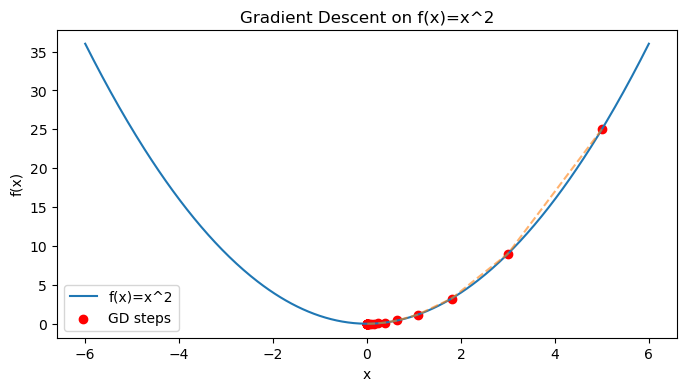

In [11]:
# Gradient descent 1D with visualization
def gradient_descent_1d(f, df, x0, lr=0.1, steps=30):
    x = x0
    history = [x]
    for i in range(steps):
        x = x - lr * df(x)
        history.append(x)
    return np.array(history)

f = lambda x: x**2
df = lambda x: 2*x
hist = gradient_descent_1d(f, df, x0=5.0, lr=0.2, steps=25)

# plot
xs = np.linspace(-6, 6, 400)
plt.figure(figsize=(8,4))
plt.plot(xs, f(xs), label='f(x)=x^2')
plt.scatter(hist, f(hist), color='red', label='GD steps')
plt.plot(hist, f(hist), '--', alpha=0.6)
plt.legend(); plt.title('Gradient Descent on f(x)=x^2')
plt.xlabel('x'); plt.ylabel('f(x)');


## Gradient Descent (Multivariate)
Update: $\mathbf{x}_{t+1} = \mathbf{x}_t - \alpha \nabla f(\mathbf{x}_t)$

Text(0, 0.5, 'y')

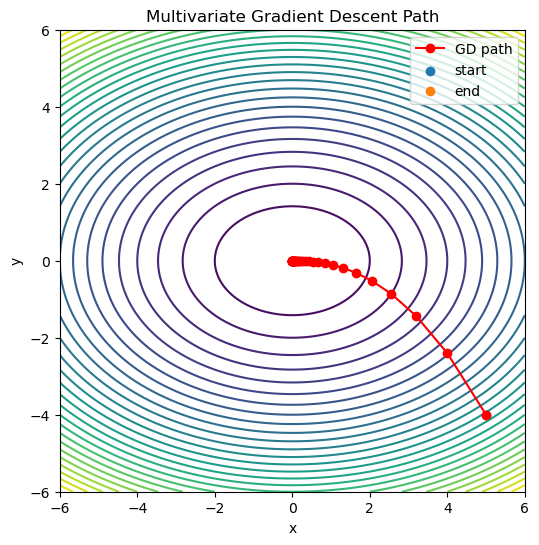

In [12]:
# Multivariate gradient descent example
def gradient_descent_multivariate(f, x0, lr=0.1, steps=50):
    x = np.array(x0, dtype=float)
    history = [x.copy()]
    for i in range(steps):
        g = gradient(f, x)
        x -= lr * g
        history.append(x.copy())
    return np.array(history)

f6 = lambda x, y: x**2 + 2*y**2
hist2 = gradient_descent_multivariate(f6, [5.0, -4.0], lr=0.1, steps=40)

# Plot trajectory (contour)
x_vals = np.linspace(-6,6,200)
y_vals = np.linspace(-6,6,200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = X**2 + 2*Y**2

plt.figure(figsize=(6,6))
cs = plt.contour(X, Y, Z, levels=30)
plt.plot(hist2[:,0], hist2[:,1], marker='o', color='red', label='GD path')
plt.scatter(hist2[0,0], hist2[0,1], label='start')
plt.scatter(hist2[-1,0], hist2[-1,1], label='end')
plt.legend(); plt.title('Multivariate Gradient Descent Path')
plt.xlabel('x'); plt.ylabel('y')


## Numerical Stability Tips
- Choose h carefully for finite differences (not too small).
- Use analytic gradients when possible (more accurate & faster).
- Watch learning rate for gradient descent; visualize loss if needed.